# Review

## Numerical integration 

* `I, e = quad(f, a, b)` evaluates $$\int_a^bf(x)dx$$
  * $f(x)$ is the integrand
  * $a$ and $b$ are the lower and upper limits, respectively. They must be constants, or functions of $x$
 


# Example

Find the area bounded between $y=\cos x$, $y=x$, and the $x$-axis for $0\leq x\leq \pi/2$

First, let us plot the area

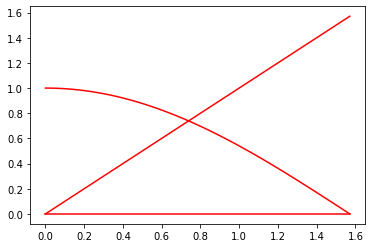

In [10]:
from numpy import linspace, pi, cos

from matplotlib.pyplot import plot

x = linspace(0, pi/2, 100)
plot(x, cos(x), "-r", x, x, "-r", x, x*0, "-r")

## Method 1
We can see that this coorresponds to 
$$\int_0^{\pi/2}\min\{x,\cos x\}dx$$

In [19]:
from scipy.integrate import quad
from numpy import min
f = lambda x: min([x, cos(x)])
A, e = quad(f, 0, pi/2)
print("area=", A)

area= 0.5995113875495296


## Method 2
Alternatively, the area is
$$\int_0^axdx +\int_a^{\pi/2} \cos x dx$$
where $a$ is the intersection fo $x$ and $\cos x$

In [23]:
# solve the intersection a
from scipy.optimize import fsolve
# note that fsolve returns a vector, depending on the dimension of the function to solve.
# here cos(x)-x is 1-dimensional. So we only need the first element.
a = fsolve(lambda x:cos(x)-x, 1)[0]
print("a=", a)

A1, e1 = quad(lambda x: x, 0, a)
A2, e2 = quad(cos, a, pi/2)
print("A=", A1+A2)

a= 0.7390851332151607
A= 0.599511387886621


Note that we cannot solve this problem using sympy, because we cannot solve the intersection $a$ using sympy.

# Group assignment

Compute the area bounded by the curve $$y^2+y+x^4=1$$

* Hint: 
  * First, solve $y$ as a function of x symbolically
  * use lambdify to convert the two solutions as lambda functions
  * Figure out which one is larger, 
  * compute the area using the quad function.
  * Note that $-\sqrt[4]{5/4}\leq x\leq \sqrt[4]{5/4}$

In [25]:
from sympy import *

x, y = symbols("x, y", real=True)
eq = y**2+y+x**4-1
sol = solve(eq, y)
display(sol[0], sol[1])



-sqrt(5 - 4*x**4)/2 - 1/2

sqrt(5 - 4*x**4)/2 - 1/2

In [27]:
# sol[0] < sol[1]
f = lambdify(x, sol[0])
g = lambdify(x, sol[1])

quad(lambda x: g(x)-f(x), -sqrt(sqrt(5/4)), sqrt(sqrt(5/4)))

(4.132981550491895, 9.95610438536687e-09)